In [ ]:
import pandas as pd

df = pd.read_csv("dt.csv")
#converting categorical traffic density to numerical values
density_map = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

df['Traffic_Density_Num'] = df['Traffic Density'].map(density_map)
print(df.head())

          City Vehicle Type Weather Economic Condition Day Of Week  \
0     New York          Car   Sunny             Stable      Monday   
1     New York          Car   Sunny             Stable      Monday   
2     New York          Bus   Rainy             Stable     Tuesday   
3  Los Angeles          Car  Cloudy             Stable   Wednesday   
4  Los Angeles          Car   Sunny             Stable    Thursday   

   Hour Of Day  Speed  Is Peak Hour  Random Event Occurred  \
0            8     60          True                  False   
1           12     55          True                  False   
2           16     40         False                  False   
3           10     65         False                  False   
4           18     50          True                   True   

   Energy Consumption Traffic Density  Traffic_Density_Num  
0                  50          Medium                    2  
1                  48            High                    3  
2                  60  

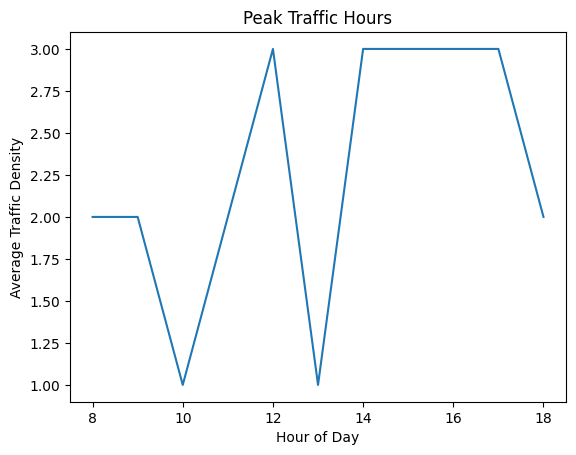

In [30]:
#Peak Traffic Hours (Line Plot)
import matplotlib.pyplot as plt

peak_hours = df.groupby('Hour Of Day')['Traffic_Density_Num'].mean()

plt.figure()
plt.plot(peak_hours)
plt.xlabel("Hour of Day")
plt.ylabel("Average Traffic Density")
plt.title("Peak Traffic Hours")
plt.show()


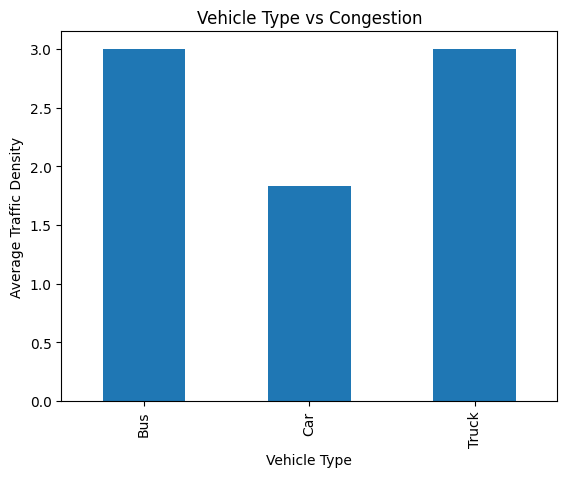

In [31]:
#Vehicle Type vs Congestion (Bar Chart)
vehicle_congestion = df.groupby('Vehicle Type')['Traffic_Density_Num'].mean()

plt.figure()
vehicle_congestion.plot(kind='bar')
plt.xlabel("Vehicle Type")
plt.ylabel("Average Traffic Density")
plt.title("Vehicle Type vs Congestion")
plt.show()


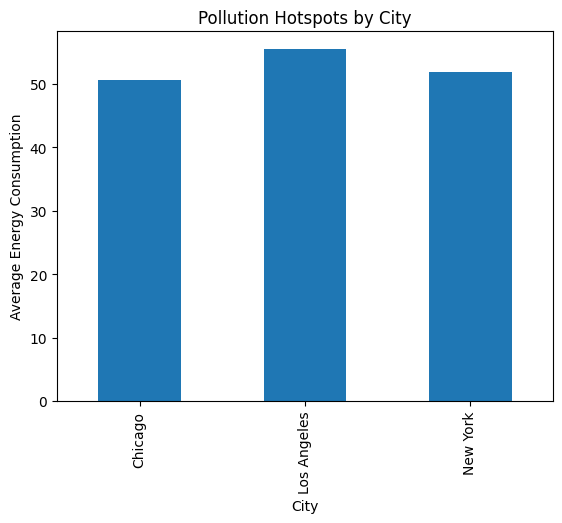

In [32]:
#Pollution Hotspots (City-based proxy)
city_pollution = df.groupby('City')['Energy Consumption'].mean()

plt.figure()
city_pollution.plot(kind='bar')
plt.xlabel("City")
plt.ylabel("Average Energy Consumption")
plt.title("Pollution Hotspots by City")
plt.show()



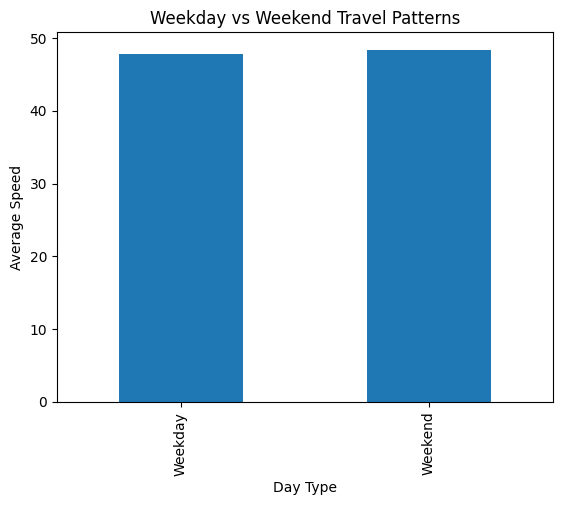

In [33]:
#Step 5: Weekday vs Weekend Comparison
df['Day_Type'] = df['Day Of Week'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)

speed_compare = df.groupby('Day_Type')['Speed'].mean()

plt.figure()
speed_compare.plot(kind='bar')
plt.xlabel("Day Type")
plt.ylabel("Average Speed")
plt.title("Weekday vs Weekend Travel Patterns")
plt.show()
